# load data

In [4]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

def load_data(root_path, test_size=0.2, random_state=42):
    """
    加载预处理的手势数据，并拆分为训练集和测试集。
    
    参数：
    root_path (str): 存储 processed_gesture_data.npy 和 gesture_labels.npy 的根目录
    test_size (float): 测试集比例，默认 20%
    random_state (int): 随机种子，确保可复现性
    
    返回：
    X_train, X_test, y_train, y_test: 训练集和测试集的数据及标签
    """
    data_path = os.path.join(root_path, "processed_gesture_data.npy")
    label_path = os.path.join(root_path, "gesture_labels.npy")
    
    if not os.path.exists(data_path) or not os.path.exists(label_path):
        raise FileNotFoundError("Processed gesture data or labels not found. Please run process_all_gesture_files first.")
    
    print("Loading processed data...")
    X = np.load(data_path,allow_pickle=True)
    y = np.load(label_path,allow_pickle=True)
    
    print(f"Data shape: {X.shape}, Labels shape: {y.shape}")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    
    print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")
    
    return X_train, X_test, y_train, y_test

data_folder = r"new_collect\fzh"  
X_train, X_test, y_train, y_test = load_data(data_folder)


Loading processed data...
Data shape: (325, 19, 100, 10), Labels shape: (325,)
Training set: (260, 19, 100, 10), Testing set: (65, 19, 100, 10)


# load selected data

In [2]:
# import os
# import numpy as np
# from sklearn.model_selection import train_test_split

# def load_data(root_path, selected_labels=None, test_size=0.2, random_state=42):
#     """
#     加载预处理的手势数据，并拆分为训练集和测试集，支持选择特定的标签。
    
#     参数：
#     - root_path (str): 存储 `processed_gesture_data.npy` 和 `gesture_labels.npy` 的根目录
#     - selected_labels (list[int] or None): 选择加载的标签列表，例如 [1, 4, 6, 7]。如果 None，则加载所有数据。
#     - test_size (float): 测试集比例，默认 20%
#     - random_state (int): 随机种子，确保可复现性
    
#     返回：
#     - X_train, X_test, y_train, y_test: 训练集和测试集的数据及标签
#     """
#     data_path = os.path.join(root_path, "processed_gesture_data.npy")
#     label_path = os.path.join(root_path, "gesture_labels.npy")
    
#     if not os.path.exists(data_path) or not os.path.exists(label_path):
#         raise FileNotFoundError("Processed gesture data or labels not found. Please run process_all_gesture_files first.")
    
#     print("Loading processed data...")
#     X = np.load(data_path, allow_pickle=True)
#     y = np.load(label_path, allow_pickle=True)
    
#     print(f"Original Data shape: {X.shape}, Labels shape: {y.shape}")

#     # 选择指定标签的数据
#     if selected_labels is not None:
#         selected_labels = set(selected_labels)  # 转换为集合加速查询
#         mask = np.isin(y, list(selected_labels))  # 选择符合标签的数据
#         X = X[mask]
#         y = y[mask]
#         print(f"Filtered Data shape (after selecting labels {selected_labels}): {X.shape}")

#     # 划分训练集和测试集
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=test_size, random_state=random_state, stratify=y
#     )

#     print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")
    
#     return X_train, X_test, y_train, y_test

# # 示例调用：加载所有数据
# data_folder = r"new_collect\fzh"
# X_train, X_test, y_train, y_test = load_data(data_folder)

# # 示例调用：只加载选定的标签
# selected_labels = [1, 4, 6, 7]
# X_train, X_test, y_train, y_test = load_data(data_folder, selected_labels=selected_labels)


Loading processed data...
Original Data shape: (325, 19, 100, 10), Labels shape: (325,)
Training set: (260, 19, 100, 10), Testing set: (65, 19, 100, 10)
Loading processed data...
Original Data shape: (325, 19, 100, 10), Labels shape: (325,)
Filtered Data shape (after selecting labels {1, 4, 6, 7}): (100, 19, 100, 10)
Training set: (80, 19, 100, 10), Testing set: (20, 19, 100, 10)


# KNN

In [6]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)  # 转换成 0,1,2
y_test = encoder.transform(y_test)

X_train = np.nan_to_num(X_train, nan=0.0)
X_test = np.nan_to_num(X_test, nan=0.0)
y_train = np.nan_to_num(y_train, nan = 0.0)
y_test = np.nan_to_num(y_test, nan = 0.0)
X_train = X_train[:,:,:,:]
X_test = X_test[:,:,:,:]
# **KNN 训练**
knn = KNeighborsClassifier(n_neighbors=4)  # k=5
X_train_flatten = X_train.reshape(X_train.shape[0], -1)  # (batch, 15*10)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)  # (batch, 15*10)

knn.fit(X_train_flatten, y_train)

# **KNN 预测**
y_pred = knn.predict(X_test_flatten)

# **评估**
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN 测试集准确率: {accuracy:.2f}")

# **打印分类报告**
print("分类报告:\n", classification_report(y_test, y_pred))


KNN 测试集准确率: 0.74
分类报告:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       0.75      0.60      0.67         5
           3       0.50      0.80      0.62         5
           4       0.60      0.60      0.60         5
           5       1.00      1.00      1.00         5
           6       0.67      0.80      0.73         5
           7       0.43      0.60      0.50         5
           8       0.83      1.00      0.91         5
           9       1.00      0.60      0.75         5
          10       0.67      0.80      0.73         5
          11       0.75      0.60      0.67         5
          12       1.00      0.20      0.33         5

    accuracy                           0.74        65
   macro avg       0.78      0.74      0.73        65
weighted avg       0.78      0.74      0.73        65



# confusion matrix

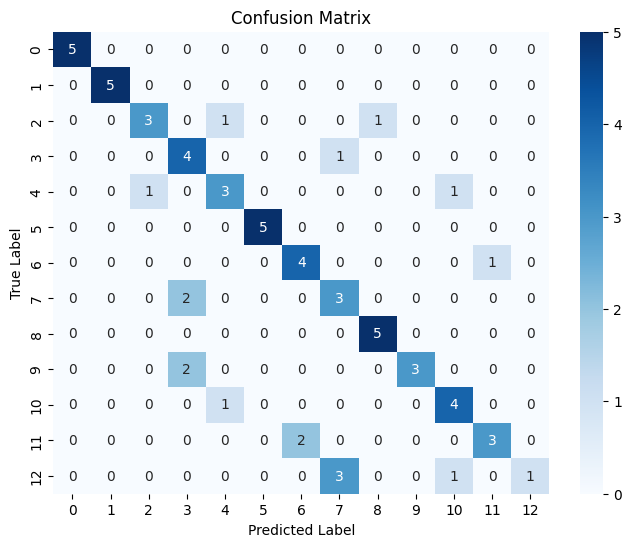

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 可视化
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
